In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt

In [2]:
df_WHR_2021 = pd.read_csv('2_Prepaired_Data/WHR_2021_Prepaired_2023-07-17-21-24-42.csv')
df_WHR = pd.read_csv('2_Prepaired_Data/WHR_Prepaired_2023-07-17-21-24-42.csv')
df_Suicidal = pd.read_csv('2_Prepaired_Data/Suicidal_Prepaired_2023-07-17-21-24-42.csv')

## Merging WHR,WHR2021

In [3]:
df_WHR_2021

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
140,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
141,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
142,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [4]:
df_WHR_2021.rename(columns = {'Country name':'Country name',
                              'Regional indicator':'Regional indicator',
                             'Ladder score':'Life Ladder',
                             'Logged GDP per capita':'Log GDP per capita',
                             'Social support':'Social support',
                             'Healthy life expectancy':'Healthy life expectancy at birth',
                             'Freedom to make life choices':'Freedom to make life choices',
                             'Generosity':'Generosity',
                             'Ladder score in Dystopia':'Ladder score in Dystopia',
                             'Perceptions of corruption':'Perceptions of corruption'}, inplace = True)

In [5]:
df_merged = df_WHR.merge(df_WHR_2021['Regional indicator'],left_on=df_WHR['Country name'],right_on=df_WHR_2021['Country name']).drop('key_0', axis=1)

In [6]:
df_WHR.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [7]:
df_merged[df_merged['Country name']== 'Egypt']['year']

471    2005
472    2007
473    2008
474    2009
475    2010
476    2011
477    2012
478    2013
479    2014
480    2015
481    2016
482    2017
483    2018
484    2019
485    2020
Name: year, dtype: int64

In [8]:
for x in df_WHR_2021['Country name'].unique():
    
    df2 =pd.DataFrame({'Country name': x,
           'year': 2021,
           'Life Ladder': df_WHR_2021[df_WHR_2021['Country name']== x]['Life Ladder'],
           'Log GDP per capita':df_WHR_2021[df_WHR_2021['Country name']== x]['Log GDP per capita'],
           'Social support':df_WHR_2021[df_WHR_2021['Country name']== x]['Social support'],
           'Healthy life expectancy at birth':df_WHR_2021[df_WHR_2021['Country name']== x]['Healthy life expectancy at birth'],
           'Freedom to make life choices':df_WHR_2021[df_WHR_2021['Country name']== x]['Freedom to make life choices'],
           'Generosity':df_WHR_2021[df_WHR_2021['Country name']== x]['Generosity'],
           'Perceptions of corruption':df_WHR_2021[df_WHR_2021['Country name']== x]['Perceptions of corruption'],
           'Regional indicator': df_WHR_2021[df_WHR_2021['Country name']== x]['Regional indicator']
          })
    df_merged =pd.concat([df_merged,df2])


In [9]:
list(df_merged[df_merged['Country name']== 'Egypt']['year'])

[2005,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [10]:
df_merged.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia


In [11]:
df_merged = df_merged.sort_values(['Country name','year'],ascending= True).reset_index().drop('index',axis=1)

In [12]:
df_merged.loc[df_merged['Country name'] == 'Finland']

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
578,Finland,2006,7.672,10.745,0.965,69.76,0.969,-0.005,0.132,0.722,0.172,Western Europe
579,Finland,2008,7.671,10.796,0.951,70.08,0.934,0.028,0.217,0.773,0.144,Western Europe
580,Finland,2010,7.393,10.734,0.935,70.40,0.916,0.091,0.413,0.832,0.202,Western Europe
581,Finland,2011,7.354,10.754,0.938,70.64,0.936,0.101,0.320,0.773,0.205,Western Europe
582,Finland,2012,7.420,10.735,0.928,70.88,0.921,-0.001,0.361,0.796,0.202,Western Europe
583,Finland,2013,7.445,10.722,0.941,71.12,0.919,0.040,0.306,0.769,0.195,Western Europe
584,Finland,2014,7.385,10.714,0.952,71.36,0.933,-0.001,0.265,0.784,0.199,Western Europe
585,Finland,2015,7.448,10.716,0.948,71.60,0.930,0.111,0.223,0.751,0.191,Western Europe
586,Finland,2016,7.660,10.740,0.954,71.70,0.948,-0.027,0.250,0.797,0.182,Western Europe
587,Finland,2017,7.788,10.768,0.964,71.80,0.962,-0.002,0.192,0.787,0.176,Western Europe


In [13]:
df_merged.to_csv('2_Prepaired_Data/WHR_merged_Prepaired_{}.csv'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")),index= False)


## Loading Merged WHR

In [3]:
df_merged = pd.read_csv('2_Prepaired_Data/WHR_merged_Prepaired_2023-07-20-14-00-24.csv')
df_merged.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia


## EDA columnseach Feature

In [16]:
def Columns_Ranks_Calculated(year,Ladder,Column,Countryname,ascending = False):
    Column_ranks = df_merged[df_merged.year == year ].sort_values([Ladder],ascending= ascending).reset_index()
    Column_ranks = Column_ranks[[Countryname, Ladder, Column]]
    Column_ranks_Column = Column_ranks.sort_values([Column],ascending= ascending)[0:20]
    Column_ranks_Score = Column_ranks_Column.sort_values([Ladder],ascending= ascending)[0:20]
    return Column_ranks_Column[Column_ranks_Column.index < 20].count()[0]/len(Column_ranks_Score)

>  80 % of the `top 20 countries` with the heighst `freedom` score are in the top `50` Happiest countries in `2021`

> 75 % of the `top 20 countries` with the heighst `freedom` score are in the top `50` Happiest countries in `2020`

In [21]:
Freedom_Asce = [[i, Columns_Ranks_Calculated(i,'Life Ladder','Freedom to make life choices','Country name')] for i in reversed(range(2021,2004,-1))]
Freedom_Asce= pd.DataFrame(Freedom_Asce, columns =['Year', 'Percentage']) 
Freedom_Desc = [[i,Columns_Ranks_Calculated(i,'Life Ladder','Freedom to make life choices', 'Country name'    ,ascending= True)] for i in reversed(range(2021,2004,-1))]
Freedom_Desc= pd.DataFrame(Freedom_Desc, columns =['Year', 'Percentage']) 


GDP_Asce = [[i,Columns_Ranks_Calculated(i,'Life Ladder','Log GDP per capita', 'Country name' )] for i in reversed(range(2021,2004,-1))]
GDP_Asce= pd.DataFrame(GDP_Asce, columns =['Year', 'Percentage']) 
GDP_Desc = [[i,Columns_Ranks_Calculated(i,'Life Ladder','Log GDP per capita','Country name',ascending= True )] for i in reversed(range(2021,2004,-1))]
GDP_Desc= pd.DataFrame(GDP_Desc, columns =['Year', 'Percentage'])\


Social_Asce = [[i,Columns_Ranks_Calculated(i,'Life Ladder','Social support', 'Country name' )] for i in reversed(range(2021,2004,-1))]
Social_Asce= pd.DataFrame(Social_Asce, columns =['Year', 'Percentage']) 
Social_Desc = [[i,Columns_Ranks_Calculated(i,'Life Ladder','Social support','Country name',ascending= True )] for i in reversed(range(2021,2004,-1))]
Social_Desc= pd.DataFrame(Social_Desc, columns =['Year', 'Percentage']) 


Health_Asce = [[i,Columns_Ranks_Calculated(i,'Life Ladder','Healthy life expectancy at birth', 'Country name' )] for i in reversed(range(2021,2004,-1))]
Health_Asce= pd.DataFrame(Health_Asce, columns =['Year', 'Percentage']) 
Health_Desc = [[i,Columns_Ranks_Calculated(i,'Life Ladder','Healthy life expectancy at birth','Country name',ascending= True )] for i in reversed(range(2021,2004,-1))]
Health_Desc= pd.DataFrame(Health_Desc, columns =['Year', 'Percentage']) 


Generosity_Asce = [[i,Columns_Ranks_Calculated(i,'Life Ladder','Generosity', 'Country name' )] for i in reversed(range(2021,2004,-1))]
Generosity_Asce= pd.DataFrame(Generosity_Asce, columns =['Year', 'Percentage']) 
Generosity_Desc = [[i,Columns_Ranks_Calculated(i,'Life Ladder','Generosity','Country name',ascending= True )] for i in reversed(range(2021,2004,-1))]
Generosity_Desc= pd.DataFrame(Generosity_Desc, columns =['Year', 'Percentage']) 


Corrup_Asce = [[i,Columns_Ranks_Calculated(i,'Life Ladder','Perceptions of corruption', 'Country name' )] for i in reversed(range(2021,2004,-1))]
Corrup_Asce= pd.DataFrame(Corrup_Asce, columns =['Year', 'Percentage']) 
Corrup_Desc = [[i,Columns_Ranks_Calculated(i,'Life Ladder','Perceptions of corruption','Country name',ascending= True )] for i in reversed(range(2021,2004,-1))]
Corrup_Desc= pd.DataFrame(Corrup_Desc, columns =['Year', 'Percentage']) 


In [38]:
def plot_Top_bottom(df1,df2,colname):
    fig, ax = plt.subplots(figsize = (18,7), dpi = 80)
    ax.set_axisbelow(True)
    ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)

    sns.lineplot(data=df1, x='Year',y='Percentage' ,marker='o',alpha = 1)
    sns.lineplot(data=df2, x='Year',y='Percentage' ,marker='o',alpha =1)

    plt.yticks(list(map(lambda x: x/100.0, range(5, 105,5))))
    plt.xticks(Freedom_Asce['Year'])

    MA = mpatches.Patch(label='Top 20 Countries in Happiness and {}'.format(colname))
    NI = mpatches.Patch(color = 'orange', label='Bottom 20 Countries in Happiness and {}'.format(colname))

    plt.title('\n Happiness Vs {}\n'.format(colname), size=18)
    plt.xlabel('Year', size=18)
    plt.ylabel('Percentage Of Presence in 20', size = 18)
    plt.legend(handles=[MA,NI], loc='best', fontsize=14)

    plt.show()

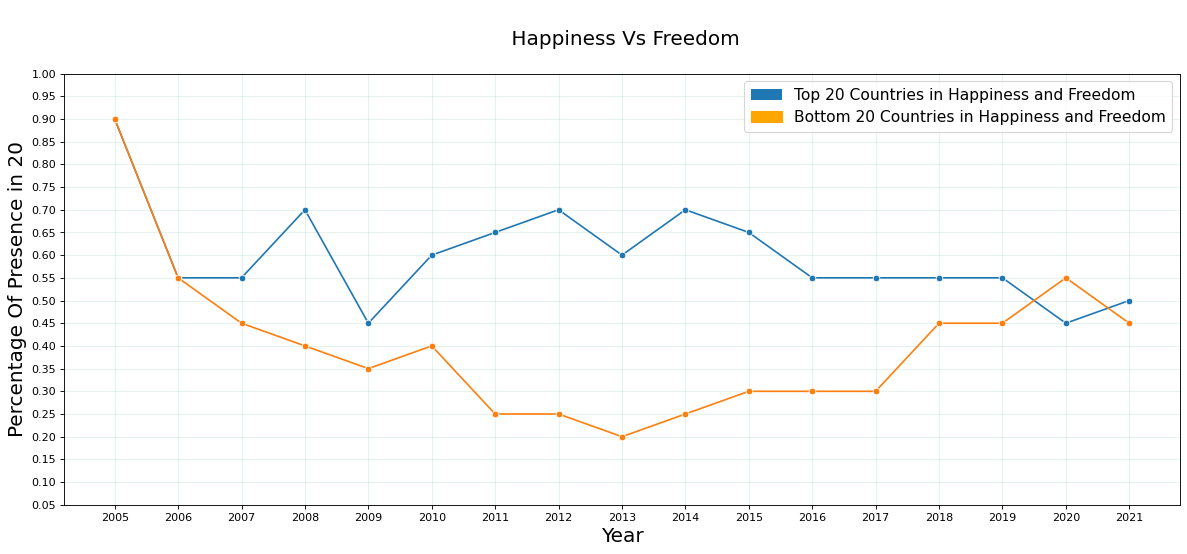

In [39]:
plot_Top_bottom(Freedom_Asce,Freedom_Desc,'Freedom')

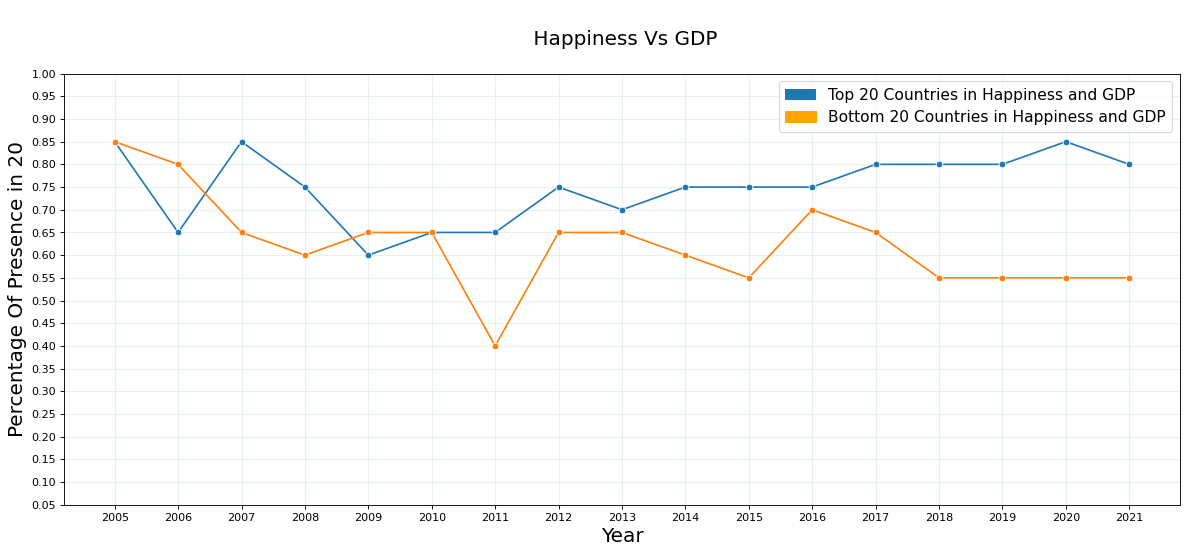

In [40]:
plot_Top_bottom(GDP_Asce,GDP_Desc,'GDP')

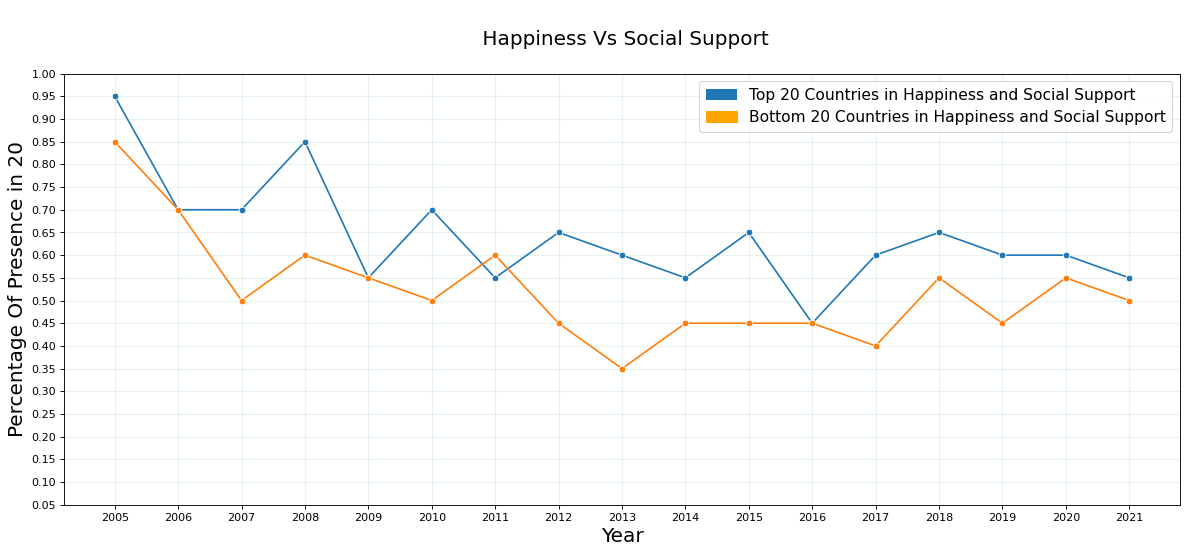

In [41]:
plot_Top_bottom(Social_Asce,Social_Desc,'Social Support')

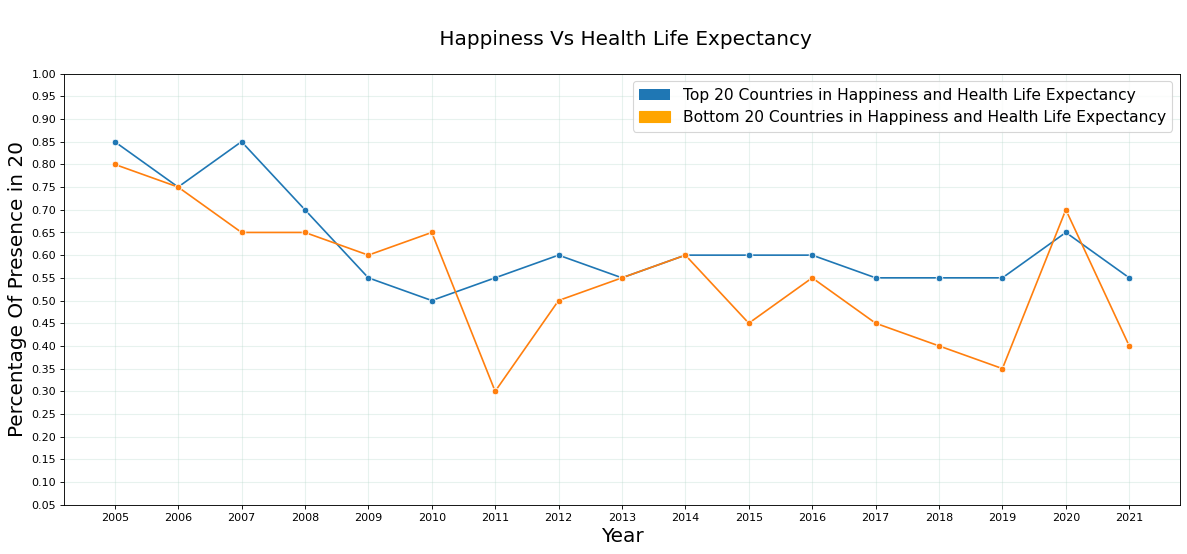

In [42]:
plot_Top_bottom(Health_Asce,Health_Desc,'Health Life Expectancy')

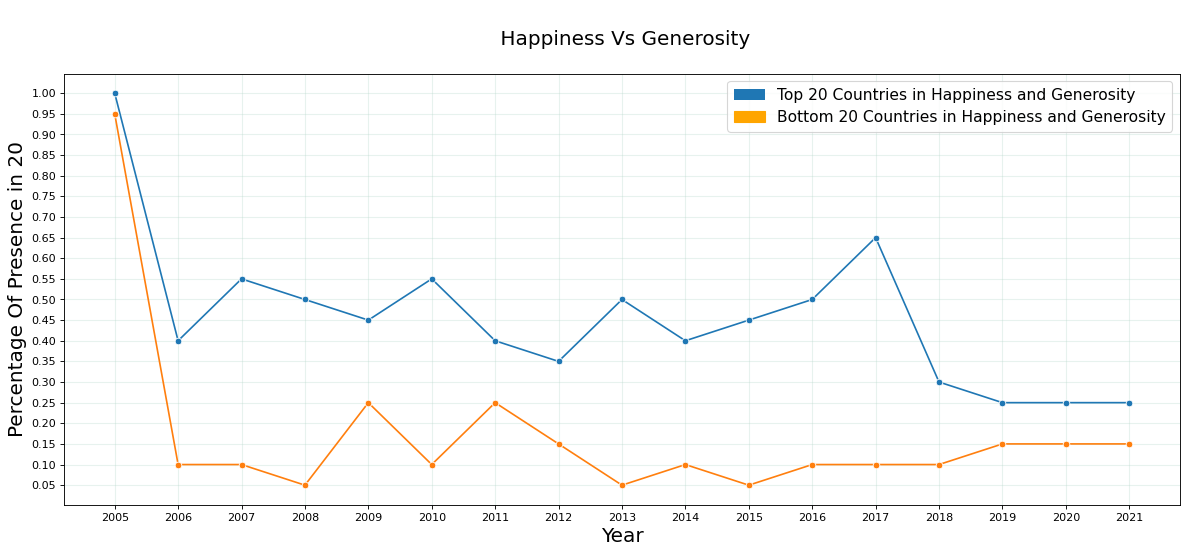

In [43]:
plot_Top_bottom(Generosity_Asce,Generosity_Desc,'Generosity')

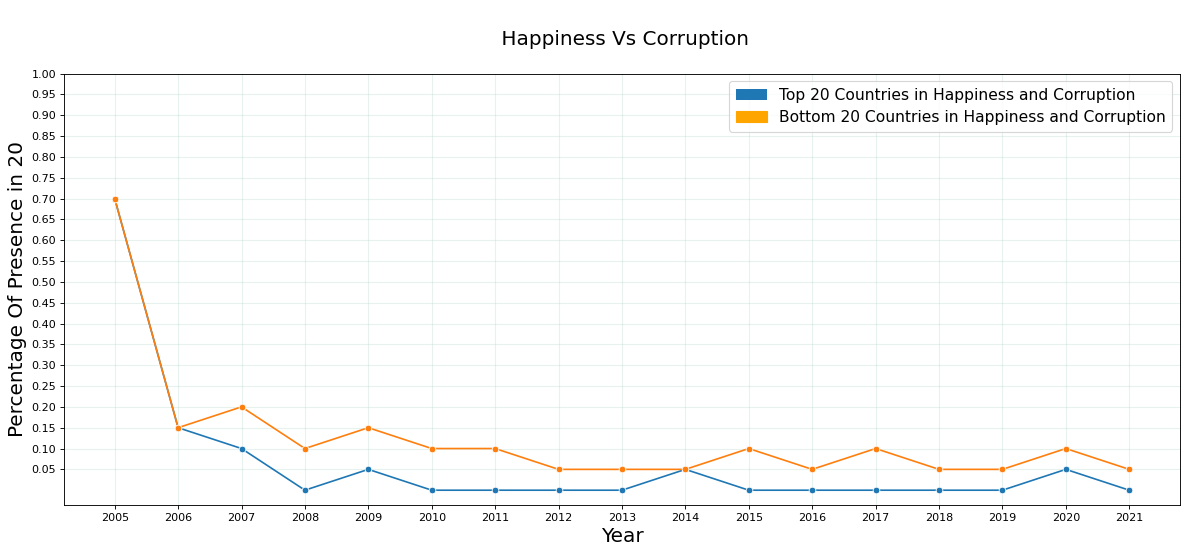

In [44]:
plot_Top_bottom(Corrup_Asce,Corrup_Desc,'Corruption')

## Validation of Years

In [34]:
df_merged.year.value_counts()

2021    144
2017    139
2019    139
2018    138
2016    133
2014    133
2015    133
2011    132
2012    130
2013    128
2010    114
2009    105
2008    103
2007     97
2020     92
2006     84
2005     27
Name: year, dtype: int64

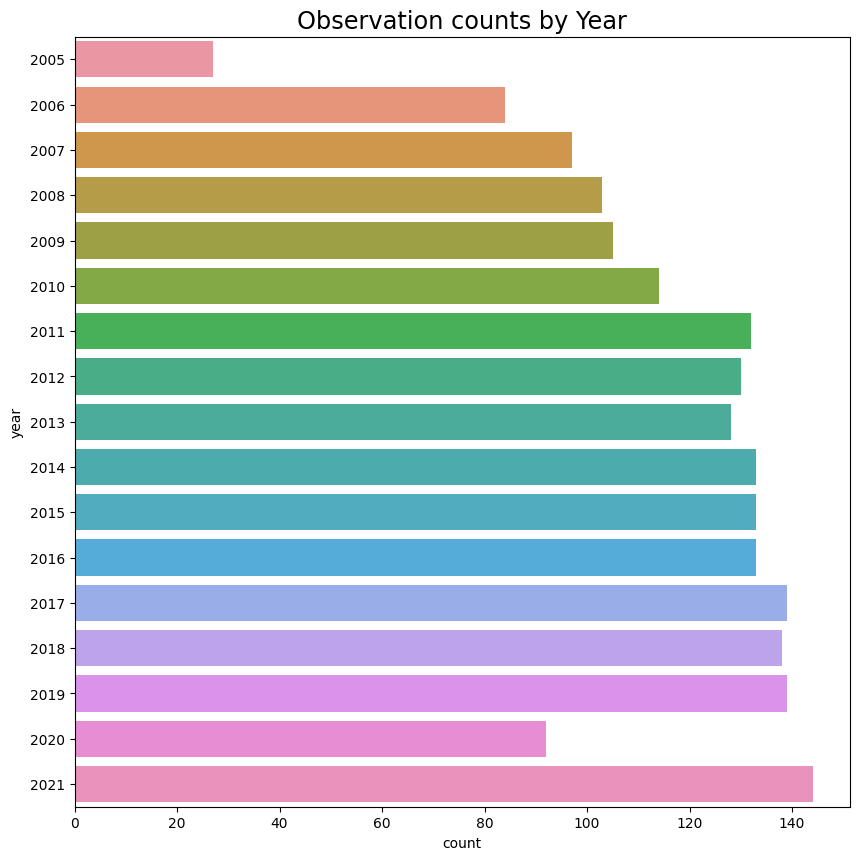

In [45]:
year_wise_cnt = df_merged.year.value_counts()
fig, ax = plt.subplots(figsize = (10,10))
plt.title('Observation counts by Year',fontsize = 'xx-large');
sns.countplot(data = df_merged,y ='year',ax = ax);

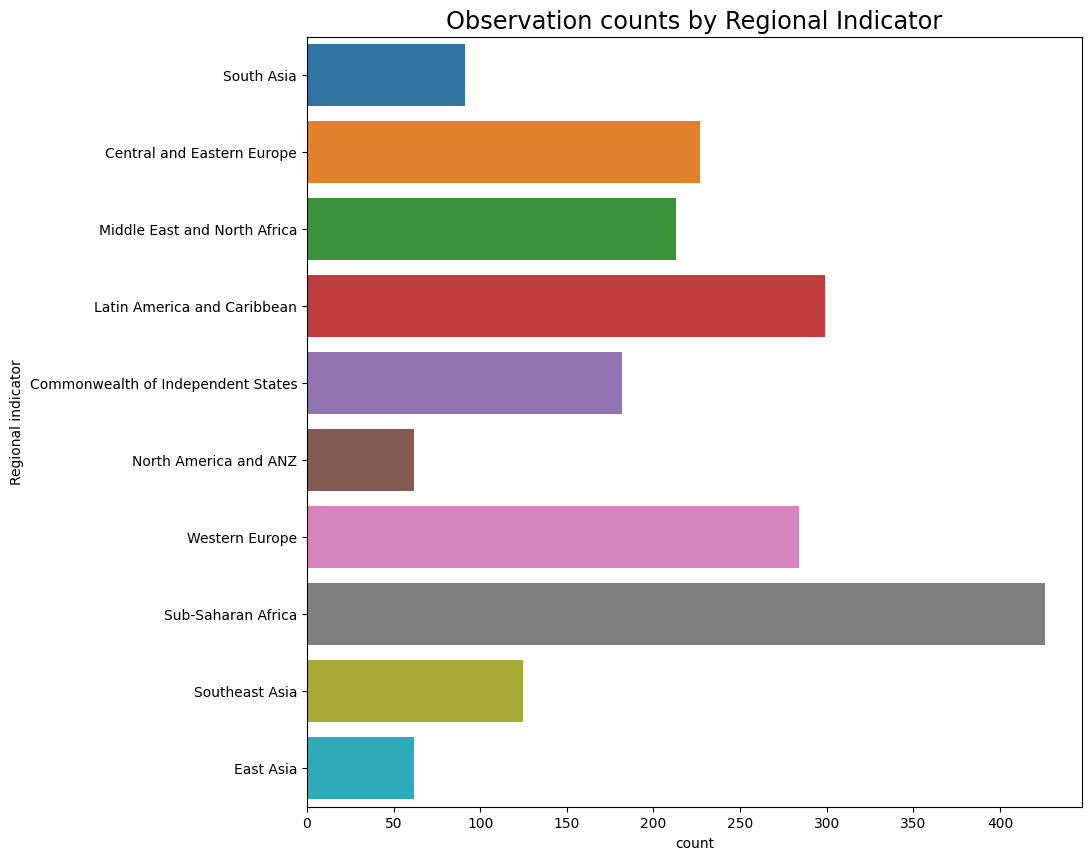

In [10]:
fig, ax = plt.subplots(figsize = (10,10))
plt.title('Observation counts by Regional Indicator',fontsize = 'xx-large');
sns.countplot(data = df_merged,y ='Regional indicator',ax = ax);

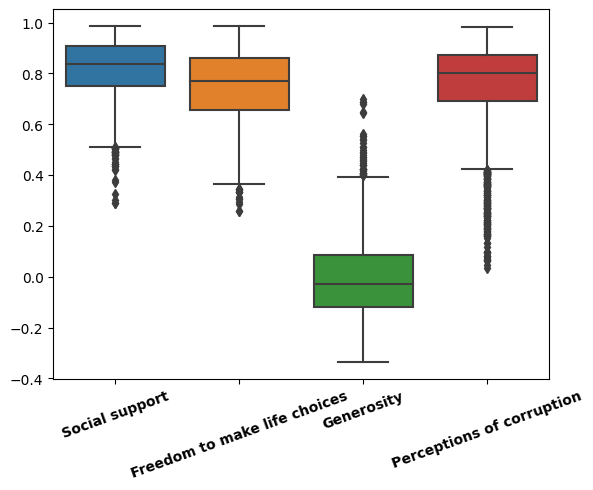

In [13]:
list_features = ["Social support", "Freedom to make life choices",
                 "Generosity",
                 "Perceptions of corruption"
                ]
sns.boxplot(data=df_merged.loc[:, list_features], orient="v")
# loc[:, list_features] means ":" select all rows and "list_features" is column selection in out dataframe.
plt.xticks(rotation=20, fontweight="bold")
plt.show()

In [9]:
df_merged.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Regional indicator'],
      dtype='object')

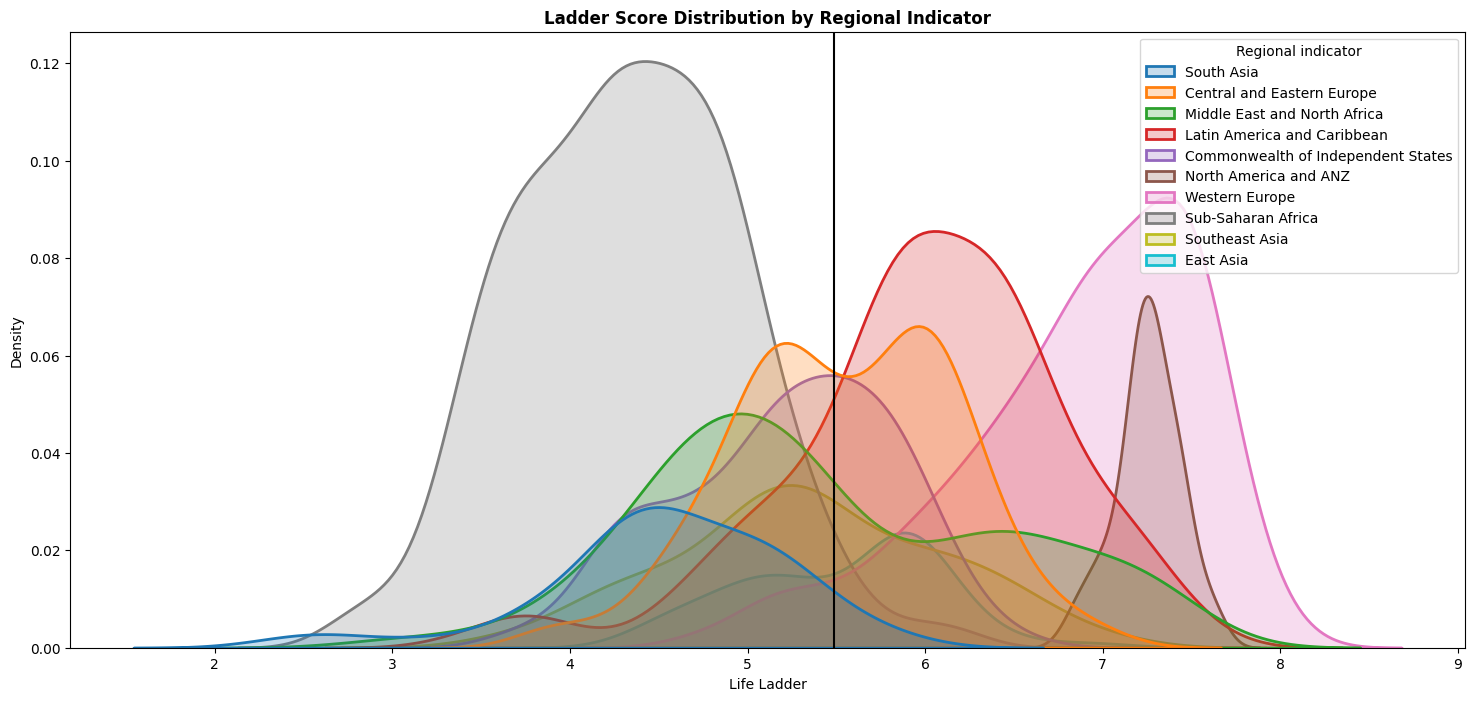

In [24]:
plt.figure(figsize=(18,8))
sns.kdeplot(data=df_merged, x="Life Ladder", hue="Regional indicator", fill=True, linewidth=2)
plt.axvline(df_merged["Life Ladder"].mean(), c="black")
plt.title("Ladder Score Distribution by Regional Indicator", fontweight='bold')
plt.show()

### `Note:` Freedom Contirbutes in Happy Countirres but doesn't contribute in Saddest Countries

In [138]:
dfx=pd.merge(
    pd.Series(freedom_ranks_2020['Country name'].unique(),
              name = 'Happy_2020'),
    pd.Series(freedom_ranks_2021['Country name'].unique(),
              name='Happy_2021'),
    left_on='Happy_2020',
    right_on='Happy_2021',
    how='right')

dfx

,Happy_2020,Happy_2021
0,NaN,Uzbekistan
1,Norway,Norway
2,Cambodia,Cambodia
3,Iceland,Iceland
4,Finland,Finland
5,Slovenia,Slovenia
6,Denmark,Denmark
7,Sweden,Sweden
8,NaN,Vietnam
9,Kyrgyz Republic,Kyrgyz Republic


In [139]:
freedom_ranks_2019_2021 = freedom_ranks_2019[freedom_ranks_2019['Country name'].isin(freedom_ranks_2021['Country name'])]
len(freedom_ranks_2019_2021['Country name'])/len(freedom_ranks_2021['Country name'])

0.85

In [140]:
dfy=pd.merge(
    pd.Series(freedom_ranks_2019['Country name'],
              name = 'Happy_2019'),
    dfx,
    left_on='Happy_2019',
    right_on='Happy_2021',
    how='right')

dfy

,Happy_2019,Happy_2020,Happy_2021
0,Uzbekistan,NaN,Uzbekistan
1,Norway,Norway,Norway
2,Cambodia,Cambodia,Cambodia
3,Iceland,Iceland,Iceland
4,Finland,Finland,Finland
5,Slovenia,Slovenia,Slovenia
6,Denmark,Denmark,Denmark
7,Sweden,Sweden,Sweden
8,Vietnam,NaN,Vietnam
9,Kyrgyz Republic,Kyrgyz Republic,Kyrgyz Republic


In [141]:
dfz=pd.merge(
    pd.Series(freedom_ranks_2018['Country name'],
              name = 'Happy_2018'),
    dfy,
    left_on='Happy_2018',
    right_on='Happy_2021',
    how='right')

dfz

,Happy_2018,Happy_2019,Happy_2020,Happy_2021
0,Uzbekistan,Uzbekistan,NaN,Uzbekistan
1,Norway,Norway,Norway,Norway
2,Cambodia,Cambodia,Cambodia,Cambodia
3,NaN,Iceland,Iceland,Iceland
4,Finland,Finland,Finland,Finland
5,Slovenia,Slovenia,Slovenia,Slovenia
6,Denmark,Denmark,Denmark,Denmark
7,Sweden,Sweden,Sweden,Sweden
8,NaN,Vietnam,NaN,Vietnam
9,Kyrgyz Republic,Kyrgyz Republic,Kyrgyz Republic,Kyrgyz Republic


In [65]:
freedom_ranks_2021[freedom_ranks_2021['Country name'] == 'Malta']

NameError: name 'freedom_ranks_2021' is not defined

In [143]:
Malta = df_WHB[df_WHB.year == 2020 ].sort_values(['Freedom to make life choices'],ascending= False).reset_index()

In [144]:
Malta[Malta ['Country name'] == 'Malta' ] 

,index,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,1087,Malta,2020,6.157,NaN,0.938,72.2,0.931,NaN,0.675,0.601,0.411


In [145]:
freedom_ranks_2020

,Country name,year
0,Norway,2020
1,Cambodia,2020
2,Finland,2020
3,Slovenia,2020
4,Estonia,2020
5,Sweden,2020
6,Iceland,2020
7,Bahrain,2020
8,United Arab Emirates,2020
9,Denmark,2020
